In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Columnas disponibles: ['Series', 'Time', 'CPU_Load', 'Network_RX', 'Network_TX', 'Inlet_Temperature', 'CPU1_Temperature', 'CPU2_Temperature', 'Fan_speed1', 'Fan_speed2', 'Fan_speed3', 'Fan_speed4', 'Ram', 'Ram_Used', 'No_Of_Running_vms', 'CPU_cores', 'CPU_cores_used', 'Power']
Primeras 10 filas del fichero CSV:
        Series                 Time  CPU_Load    Network_RX     Network_TX  \
0  qh2-rcc120   2018-10-09 11:20:00  3.468500  4.083433e+05  147737.953254   
1  qh2-rcc120   2018-10-09 11:30:00  3.622833  4.458941e+04  202395.924763   
2  qh2-rcc120   2018-10-09 11:40:00  3.414500  4.014687e+04  157905.963285   
3  qh2-rcc120   2018-10-09 11:50:00  3.332500  4.416924e+05  142941.034500   
4  qh2-rcc120   2018-10-09 12:00:00  3.364000  4.220578e+05  770341.893781   
5  qh2-rcc120   2018-10-09 12:10:00  3.609000  4.131740e+04  209986.898892   
6  qh2-rcc120   2018-10-09 12:20:00  4.315667  3.392553e+05  301362.559152   
7  qh2-rcc120   2018-10-09 12:30:00  6.522500  1.839193e+06  16

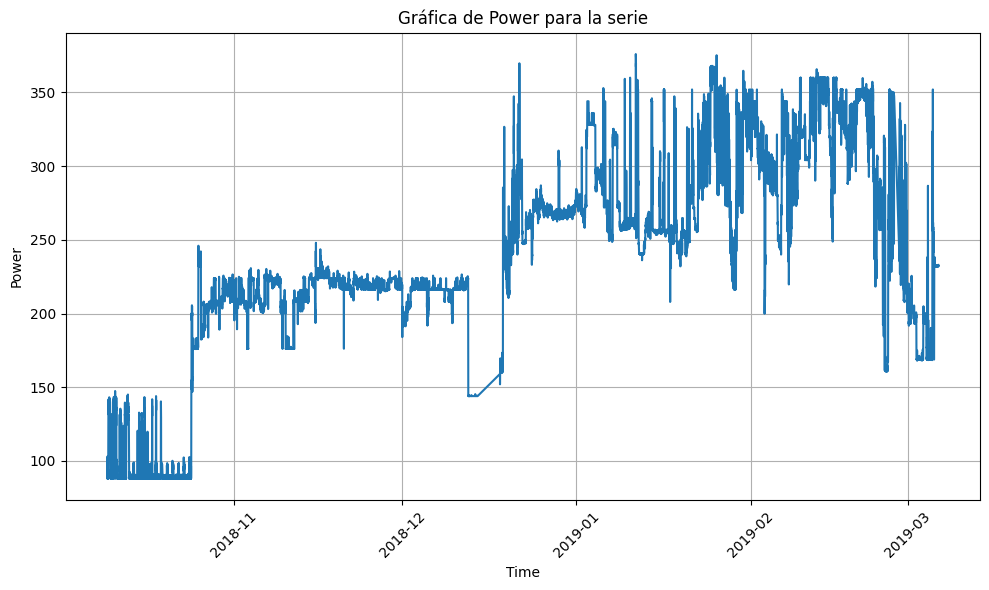

In [3]:

# Cargar el fichero CSV usando ';' como separador
df = pd.read_csv('DataSetModificado2.csv', sep=';')
# csv = pd.read_csv('DataSetModificado2.csv', sep=';')
# Mostrar las columnas disponibles para verificar nombres
print("Columnas disponibles:", df.columns.tolist())

# Mostrar las primeras 10 filas
print("Primeras 10 filas del fichero CSV:")
print(df.head(10))

# Mostrar el tipo de cada columna
print("\nTipos de datos de cada columna:")
print(df.dtypes)
    
# Convertir la columna 'Time' a formato datetime usando el formato especificado
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# Convertir la columna 'Power' de tipo Object a tipo float
# df['Power'] = df['Power'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    
# Filtrar los datos para la serie "qh2-rcc120"
df_filtered = df[df['Series'] == 'qh2-rcc120 '].copy()


# Eliminar filas donde 'Time' no se pudo convertir correctamente (NaT)
df_filtered.dropna(subset=['Time'], inplace=True)
    
if df_filtered.empty:
    print("No se encontraron datos para la serie.")


 # Ordenar los datos por la columna 'Time'
df_filtered.sort_values('Time', inplace=True)
    
# Crear la gráfica: eje x (Time) y eje y (power)
plt.figure(figsize=(10, 6))
# plt.plot(df_filtered['Time'], df_filtered['Power'], marker='o', linestyle='-')
plt.plot(df_filtered['Time'], df_filtered['Power'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Gráfica de Power para la serie')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [5]:
import warnings
warnings.filterwarnings(action='ignore',module='sklearn')

In [6]:
print(df.head())

        Series                Time  CPU_Load     Network_RX     Network_TX  \
0  qh2-rcc120  2018-10-09 11:20:00  3.468500  408343.338389  147737.953254   
1  qh2-rcc120  2018-10-09 11:30:00  3.622833   44589.407008  202395.924763   
2  qh2-rcc120  2018-10-09 11:40:00  3.414500   40146.872453  157905.963285   
3  qh2-rcc120  2018-10-09 11:50:00  3.332500  441692.385339  142941.034500   
4  qh2-rcc120  2018-10-09 12:00:00  3.364000  422057.822324  770341.893781   

   Inlet_Temperature  CPU1_Temperature  CPU2_Temperature   Fan_speed1  \
0          16.966667         37.083333         36.716667  7502.833333   
1          17.000000         37.783333         37.083333  7141.166667   
2          17.000000         38.233333         37.466667  6728.166667   
3          17.000000         38.183333         37.550000  6813.333333   
4          16.950000         37.416667         36.866667  7390.833333   

    Fan_speed2   Fan_speed3   Fan_speed4        Ram  Ram_Used  \
0  7571.666667  7500.500000

In [7]:
# Convertir dataframe en numpy array
data = np.array(df)
# Datos filtrados
data = np.array(df_filtered)
X = data[:,:-1]
X = data[:, 2:]
y = data[:,-1]

# Mostrar las columnas de X y su tipo de dato
print("Columnas de X y sus tipos de datos:")
for i in range(X.shape[1]):
    print(f"Columna {i+1}: {X[:, i]}, Tipo de dato: {X[:, i].dtype}")

# Mostrar la forma de X
print("\nForma de X:", np.shape(X))

Columnas de X y sus tipos de datos:
Columna 1: [3.4685 3.622833333333333 3.4145000000000003 ... 9.001000000000003
 8.840666666666667 8.991833333333334], Tipo de dato: object
Columna 2: [408343.33838885 44589.4070085 40146.872453300006 ... 105435.69506016668
 109662.82171645 109263.53981515], Tipo de dato: object
Columna 3: [147737.95325370002 202395.9247627333 157905.96328465006 ...
 213936.99587301668 221135.48903461668 670149.6341966335], Tipo de dato: object
Columna 4: [16.966666666666665 17.0 17.0 ... 17.05 17.0 17.0], Tipo de dato: object
Columna 5: [37.083333333333336 37.78333333333335 38.23333333333334 ...
 63.41666666666666 63.53333333333334 62.8], Tipo de dato: object
Columna 6: [36.716666666666654 37.08333333333333 37.466666666666654 ... 54.6 54.7
 54.33333333333333], Tipo de dato: object
Columna 7: [7502.833333333332 7141.166666666668 6728.166666666666 ...
 8044.166666666666 8038.333333333332 8037.166666666668], Tipo de dato: object
Columna 8: [7571.666666666668 7182.0 6802.

In [8]:
# Mostrar características de la tabla de datos.
# print("Tabla de datos: %d instancias y %d atributos" % (X.shape[0], X.shape[1]))
# print("Valores de la clase:", set(y))

In [9]:
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))

(16484, 16)
(4121, 16)


In [10]:
# Estandarización de los datos de entrenamiento y test
stdr = preprocessing.StandardScaler()
X_train = stdr.fit_transform(X_train)
X_test = stdr.transform(X_test)

In [11]:
# Métricas de evaluación.
metricas = {
    # 'MAE': 'neg_mean_absolute_error',
    'MAE': make_scorer(mean_absolute_error),
    # 'MSE': 'neg_mean_squared_error',
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
    'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),}

In [12]:
# Modelo SVR original
svr_model = SVR(C=100, gamma='auto', kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [13]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO

results_svr = cross_validate(svr_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas, n_jobs=-1)


In [14]:
pprint(results_svr)

{'fit_time': array([18.74951696, 18.78070092, 17.60585022, 19.09070635, 18.07071519]),
 'score_time': array([0.73044181, 0.71060991, 0.74274755, 0.68161249, 0.7202785 ]),
 'test_MAE': array([0.13913605, 0.21088221, 0.19185584, 0.12874434, 0.18750001]),
 'test_MAPE': array([-0.0701604 , -0.13326828, -0.08430023, -0.06250178, -0.09027762]),
 'test_MSE': array([0.52049617, 8.02558017, 7.05130225, 0.6195437 , 3.4027181 ]),
 'test_RMSE': array([-0.7214542 , -2.83294549, -2.65542883, -0.78711098, -1.84464579])}


In [37]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
# model_SVR = SVR(C=100, gamma='auto', kernel='rbf')
model_SVR = SVR(C=10, gamma='scale', kernel='rbf')
model_SVR = model_SVR.fit(X_train, y_train)

In [38]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred_svr = model_SVR.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print('Test results (MAE): ', np.round(mae,4))
print('Test results (r2): ', np.round(r2,4))

Test results (MAE):  0.4248
Test results (r2):  0.9987


In [39]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', np.round(y_pred_svr[:10], 1))
print('Valores reales: ', y_test[:10])


Predicciones:    [304.  224.1 264.9 217.9 247.  215.9  89.  224.  276.1  89.2]
Valores reales:  [304.0 224.0 264.8 218.0 246.9333333333333 216.0 88.8 224.0
 272.53333333333336 89.33333333333331]


In [42]:
# Crear un DataFrame con las predicciones y los valores reales
data = {
    'Predicciones': np.round(y_pred_svr[:10], 1),
    'Valores reales': y_test[:10]
}
df = pd.DataFrame(data)

# Mostrar la tabla de datos
display(df)

,Predicciones,Valores reales
0,304.0,304.0
1,224.1,224.0
2,264.9,264.8
3,217.9,218.0
4,247.0,246.933333
5,215.9,216.0
6,89.0,88.8
7,224.0,224.0
8,276.1,272.533333
9,89.2,89.333333


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(1,1)

    # Plot linear fit
    ax.scatter(y_true, y_pred)
    ax.set_ylabel('y_pred')
    ax.set_xlabel('y_true')
    ax.set_title('Regression line')
    ax.grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax.plot(y_true, p(y_true), color='magenta')


In [20]:
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

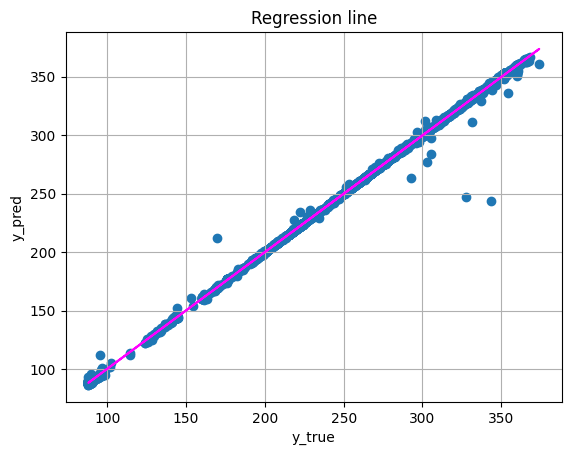

In [44]:
# Llamar a la función con los datos de ejemplo
report_regression_graphics(y_test, y_pred_svr)


In [22]:
# Modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!!
# results = cross_validate(alg, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
results_rf = cross_validate(rf_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas, n_jobs=-1)

In [24]:
pprint(results_rf)

{'fit_time': array([8.04364777, 8.13278413, 8.1621151 , 8.05262589, 8.04464459]),
 'score_time': array([0.04102206, 0.03877878, 0.0389483 , 0.04007363, 0.0410285 ]),
 'test_MAE': array([0.01460586, 0.01502817, 0.01288534, 0.01278066, 0.01482658]),
 'test_MAPE': array([-0.00814952, -0.00821785, -0.00675746, -0.00718263, -0.00812946]),
 'test_MSE': array([0.00733719, 0.00980143, 0.00414201, 0.00561851, 0.00999179]),
 'test_RMSE': array([-0.08565741, -0.09900219, -0.06435842, -0.07495675, -0.09995895])}


In [64]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
model_RF = RandomForestRegressor(n_estimators= 50,max_depth= None,min_samples_split=2,min_samples_leaf=1,bootstrap=True, random_state=42)
model_RF = model_RF.fit(X_train, y_train)

In [65]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred_rf = model_RF.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print('Test results (MAE): ', np.round(mae,4))
print('Test results (r2): ', np.round(r2,4))

Test results (MAE):  0.0097
Test results (r2):  1.0


In [66]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', np.round(y_pred_rf[:10], 1))
print('Valores reales: ', y_test[:10])

Predicciones:    [304.  224.  264.8 218.  246.9 216.   88.8 224.  272.5  89.3]
Valores reales:  [304.0 224.0 264.8 218.0 246.9333333333333 216.0 88.8 224.0
 272.53333333333336 89.33333333333331]


In [67]:
# Crear un DataFrame con las predicciones y los valores reales
data = {
    'Predicciones': np.round(y_pred_rf[:10], 1),
    'Valores reales': y_test[:10]
}
df = pd.DataFrame(data)

# Mostrar la tabla de datos
display(df)

,Predicciones,Valores reales
0,304.0,304.0
1,224.0,224.0
2,264.8,264.8
3,218.0,218.0
4,246.9,246.933333
5,216.0,216.0
6,88.8,88.8
7,224.0,224.0
8,272.5,272.533333
9,89.3,89.333333


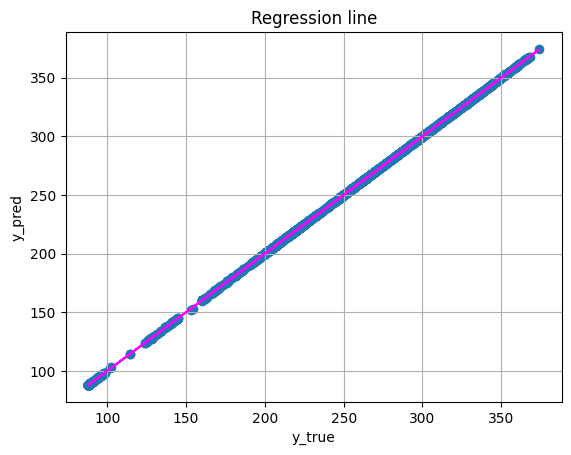

In [68]:
report_regression_graphics(y_test, y_pred_rf)

In [69]:

# Evaluación de modelos
metrics = {
    "Modelo": ["SVR", "Random Forest"],
    "MAE": [mean_absolute_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_rf)],
    "MSE": [mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_rf)],
    "R2 Score": [r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_rf)]
}
metrics_df = pd.DataFrame(metrics)

from IPython.display import display
display(metrics_df)



,Modelo,MAE,MSE,R2 Score
0,SVR,0.424834,5.833148,0.998714
1,Random Forest,0.009695,0.003186,0.999999


In [31]:
print(np.shape(X_train))
print(np.shape(y_pred_svr))


(16484, 16)
(4121,)


In [ ]:
#Cáculo de parámetros SVM

In [36]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo SVM
model = SVR()

# Definir el rango de parámetros para la búsqueda en cuadrícula
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
# }

param_grid = {
    'C': [10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Ajustar la búsqueda en cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Usar el mejor modelo encontrado para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Mejores parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [41]:
print(param_grid)

{'C': [10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}


In [ ]:
#Cálculo de parámetros RandomForest

In [59]:
from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# Definir el modelo Random Forest
model_2 = RandomForestRegressor()

# Definir el rango de parámetros para la búsqueda en cuadrícula
param_grid = {
    # 'n_estimators': [50, 100, 200]
    'n_estimators': [50],
    # 'max_depth': [None, 10, 20, 30],
    'max_depth': [None],
    # 'min_samples_split': [2, 5, 10],
    'min_samples_split': [2],
    # 'min_samples_leaf': [1, 2, 4],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(model_2, param_grid, cv=5, scoring='accuracy')

# Ajustar la búsqueda en cuadrícula a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Usar el mejor modelo encontrado para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Mejores parámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


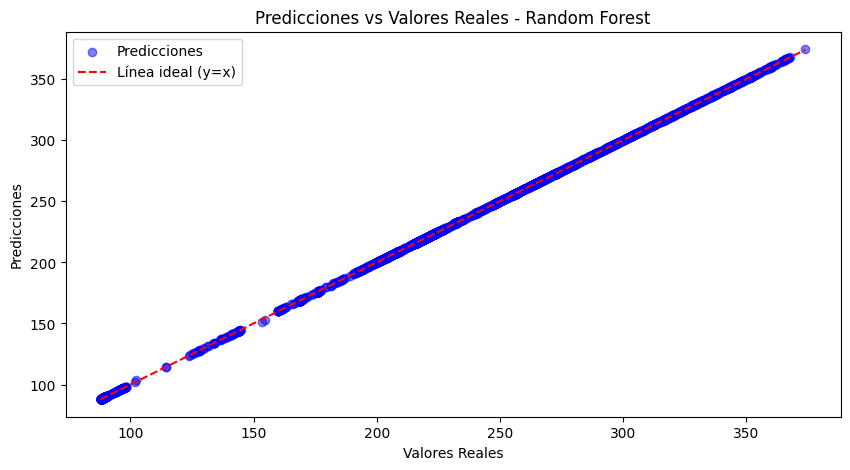

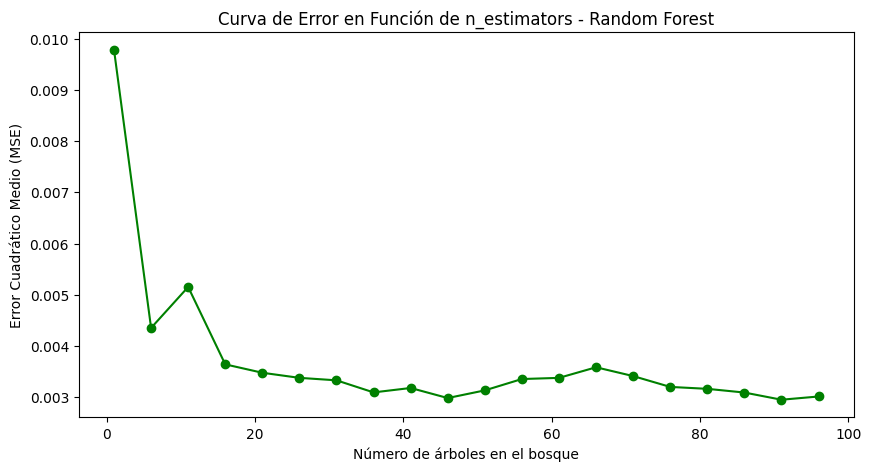

In [71]:
# 1. Importancia de Características
# feature_importances = rf_model.feature_importances_
# feature_names = X_train.columns

# plt.figure(figsize=(10, 5))
# plt.barh(feature_names, feature_importances, color='skyblue')
# plt.xlabel("Importancia")
# plt.ylabel("Características")
# plt.title("Importancia de las Características en Random Forest")
# plt.show()

# 2. Comparación de Predicciones vs Valores Reales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5, label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Línea ideal (y=x)")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales - Random Forest")
plt.legend()
plt.show()

# 3. Evolución del Error con n_estimators
errors = []
n_estimators_range = range(1, 101, 5)

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, errors, marker='o', linestyle='-', color='green')
plt.xlabel("Número de árboles en el bosque")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Curva de Error en Función de n_estimators - Random Forest")
plt.show()

In [72]:
# Verificar si las columnas necesarias están disponibles en el dataset
required_columns = ['Time', 'Power', 'CPU_Load', 'Inlet_Temperature']
missing_columns = [col for col in required_columns if col not in df.columns]

if not missing_columns:
    # Tomar una muestra reducida de los datos para evitar problemas de memoria
    df_sampled = df_filtered.sample(frac=0.001, random_state=42)

    # Ordenar los datos por tiempo
    df_sampled.sort_values('Time', inplace=True)

    # Crear el gráfico con tres variables
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Graficar la potencia
    ax1.set_xlabel("Tiempo")
    ax1.set_ylabel("Potencia (kW)", color="blue")
    ax1.plot(df_sampled['Time'], df_sampled['Power'], color="blue", alpha=0.7, label="Potencia")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Crear un segundo eje Y para la temperatura
    ax2 = ax1.twinx()
    ax2.set_ylabel("Temperatura (°C)", color="red")
    ax2.plot(df_sampled['Time'], df_sampled['Inlet_Temperature'], color="red", alpha=0.7, label="Temperatura")
    ax2.tick_params(axis="y", labelcolor="red")

    # Crear un tercer eje Y para el consumo de CPU
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))  # Desplazar el tercer eje a la derecha
    ax3.set_ylabel("Uso de CPU (%)", color="green")
    ax3.plot(df_sampled['Time'], df_sampled['CPU_Load'], color="green", alpha=0.7, label="Consumo CPU")
    ax3.tick_params(axis="y", labelcolor="green")

    # Agregar título y mejorar el diseño
    plt.title("Evolución de Potencia, Temperatura y Consumo de CPU")
    fig.tight_layout()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

else:
    print(f"Las siguientes columnas faltan en los datos: {missing_columns}")

Las siguientes columnas faltan en los datos: ['Time', 'Power', 'CPU_Load', 'Inlet_Temperature']


In [ ]:
# Modelo LSTM

Epoch 1/20


C:\Users\SESA117751\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 42374.4297 - val_loss: 6240.2769
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 890.4279 - val_loss: 930.1160
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 148.5790 - val_loss: 403.9727
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 62.1964 - val_loss: 254.1138
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 44.8663 - val_loss: 189.1191
Epoch 6/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 38.3165 - val_loss: 188.6472
Epoch 7/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 33.3423 - val_loss: 157.2548
Epoch 8/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32.8670 - val_loss: 153.5686
Epoch 9/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 34.8570 - val_loss: 167.4284
Epoch 10/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 31.6079 - val_loss: 166.2226
Epoch 11/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 29.7619 - val_loss: 166.5623
Epoch 12/20
515/515 ━━━━

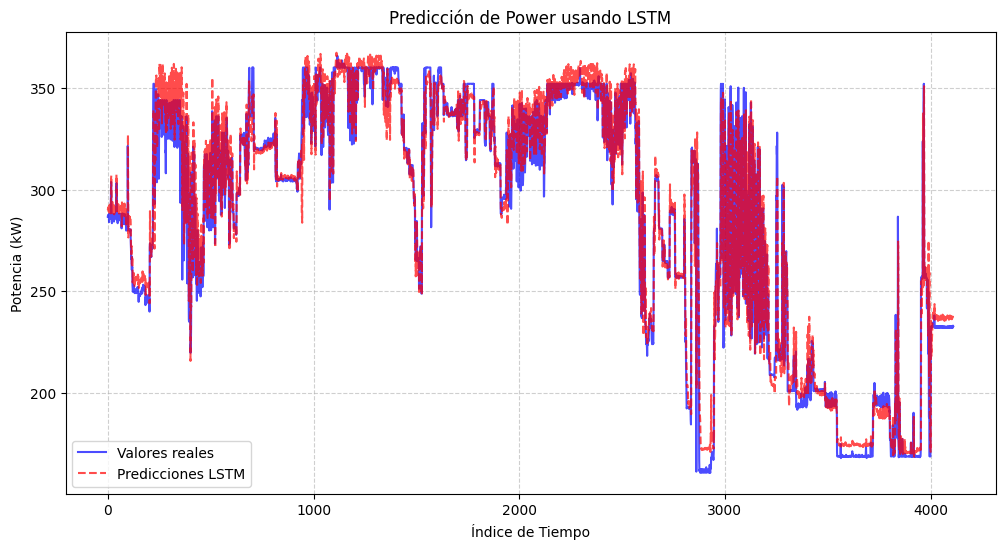

In [85]:
# Normalizar los datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)  # Convertir a float32
X_test = scaler.transform(X_test).astype(np.float32)  # Convertir a float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Convertir los datos en formato de series temporales para LSTM
def create_sequences(X, y, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32)  # Convertir a float32

seq_length = 10  # Número de pasos de tiempo usados para predecir el siguiente valor
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Construir el modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X_train.shape[1])),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train_seq, y_train_seq, validation_data=(X_test_seq, y_test_seq), epochs=20, batch_size=32, verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test_seq)

# Graficar predicciones vs valores reales sin desnormalizar
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="Valores reales", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicciones LSTM", color="red", linestyle="dashed", alpha=0.7)
plt.xlabel("Índice de Tiempo")
plt.ylabel("Potencia (kW)")
plt.title("Predicción de Power usando LSTM")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


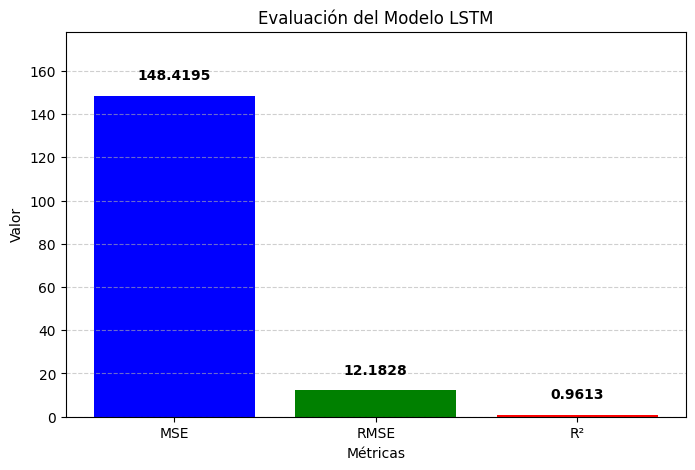

In [87]:
    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test_seq, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_seq, y_pred)

    # Crear gráfico de barras para visualizar las métricas
    plt.figure(figsize=(8, 5))
    metrics = ['MSE', 'RMSE', 'R²']
    values = [mse, rmse, r2]

    plt.bar(metrics, values, color=['blue', 'green', 'red'])
    plt.xlabel("Métricas")
    plt.ylabel("Valor")
    plt.title("Evaluación del Modelo LSTM")
    plt.ylim(0, max(values) * 1.2)  # Ajuste de escala para mejor visualización

    # Mostrar los valores en las barras
    for i, v in enumerate(values):
        plt.text(i, v + (max(values) * 0.05), f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

    plt.grid(axis='y', linestyle="--", alpha=0.6)
    plt.show()

In [88]:
# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    "Métrica": ["MSE", "RMSE", "R²"],
    "Valor": [mse, rmse, r2]
})

# Mostrar la tabla de métricas
from IPython.display import display
display(metrics_df)

,Métrica,Valor
0,MSE,148.419540
1,RMSE,12.182755
2,R²,0.961328


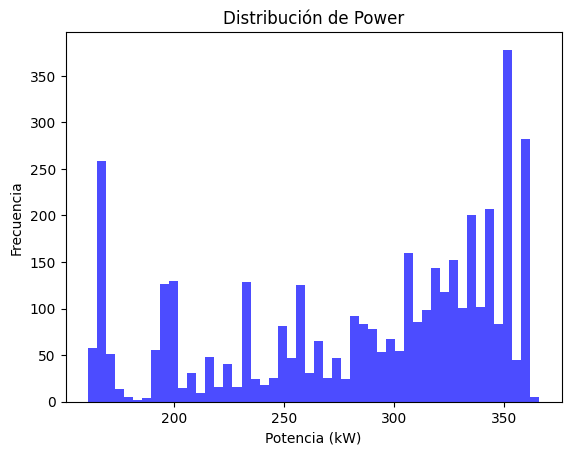

In [91]:
plt.hist(y_test_seq, bins=50, color='blue', alpha=0.7)
plt.xlabel("Potencia (kW)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Power")
plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}

--- Resultados XGBoost Regressor con GridSearchCV ---
MAE  (Error absoluto medio): 0.2314
MSE  (Error cuadrático medio): 0.2097
RMSE (Raíz del error cuadrático medio): 0.4579
MAPE (Error porcentual absoluto medio): 0.0011
R2   (Coeficiente de determinación): 1.0000


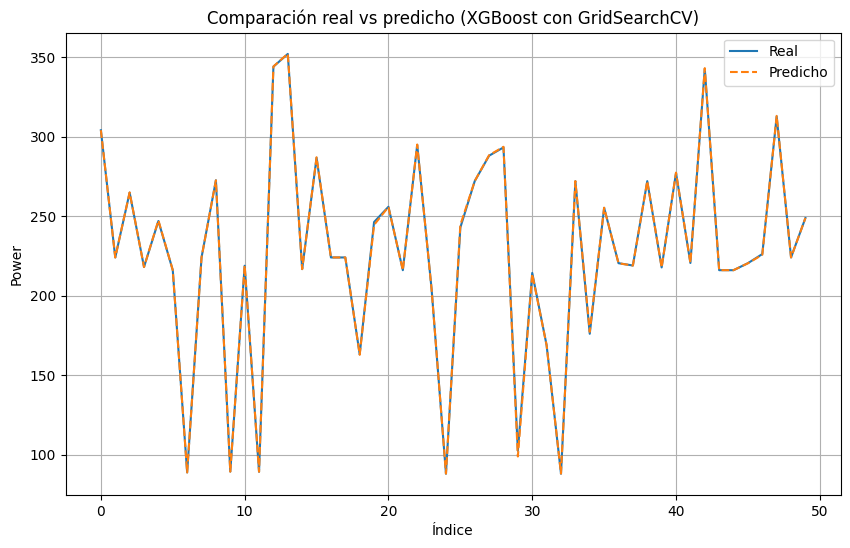

In [14]:
# Si no tienes scikit-learn instalado, ejecuta primero:
# !pip install scikit-learn

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

# Separar datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de hiperparámetros para GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [50, 100, 200]
}

# Crear el modelo XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Predecir en test usando el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("\n--- Resultados XGBoost Regressor con GridSearchCV ---")
print(f"MAE  (Error absoluto medio): {mae:.4f}")
print(f"MSE  (Error cuadrático medio): {mse:.4f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.4f}")
print(f"MAPE (Error porcentual absoluto medio): {mape:.4f}")
print(f"R2   (Coeficiente de determinación): {r2:.4f}")

# Opcional: visualización
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='Real')
plt.plot(y_pred[:50], label='Predicho', linestyle='--')
plt.title('Comparación real vs predicho (XGBoost con GridSearchCV)')
plt.xlabel('Índice')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Crear un DataFrame con las predicciones y los valores reales
data = {
    'Predicciones': np.round(y_pred[:10], 1),
    'Valores reales': y_test[:10]
}
df = pd.DataFrame(data)

# Mostrar la tabla de datos
display(df)

,Predicciones,Valores reales
0,304.000000,304.0
1,224.000000,224.0
2,264.899994,264.8
3,218.000000,218.0
4,247.300003,246.933333
5,216.000000,216.0
6,88.800003,88.8
7,224.000000,224.0
8,272.500000,272.533333
9,89.300003,89.333333
